In [20]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

import warnings

In [10]:
np.random.seed(3)
tf.random.set_seed(3)

In [11]:
df_pre = pd.read_csv('./datasets/wine.csv', header=None)
df = df_pre.sample(frac=0.15)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12
6245,5.9,0.180,0.28,1.00,0.037,24.0,88.0,0.99094,3.29,0.55,10.65,7,0
486,10.2,0.670,0.39,1.90,0.054,6.0,17.0,0.99760,3.17,0.47,10.00,5,1
273,8.4,0.715,0.20,2.40,0.076,10.0,38.0,0.99735,3.31,0.64,9.40,5,1
1993,6.8,0.370,0.51,11.80,0.044,62.0,163.0,0.99760,3.19,0.44,8.80,5,0
885,8.9,0.750,0.14,2.50,0.086,9.0,30.0,0.99824,3.34,0.64,10.50,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,8.2,0.570,0.26,2.20,0.060,28.0,65.0,0.99590,3.30,0.43,10.10,5,1
2584,6.0,0.410,0.21,1.90,0.050,29.0,122.0,0.99280,3.42,0.52,10.50,6,0
4446,5.8,0.200,0.34,1.00,0.035,40.0,86.0,0.98993,3.50,0.42,11.70,5,0
3471,5.8,0.330,0.20,16.05,0.047,26.0,166.0,0.99760,3.09,0.46,8.90,5,0


In [12]:
dataset = df.values
X = dataset[:, 0:12]
Y = dataset[:, 12]

In [13]:
model = Sequential()
model.add(Dense(30, input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [21]:
MODEL_DIR = './model'
if not os.path.exists(MODEL_DIR):
	os.mkdir(MODEL_DIR)

modelpath = './model/{epoch:02d}-{val_loss:.4f}.hdf5'
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience = 50)

history = model.fit(X, Y, validation_split=0.33, epochs=3500, batch_size=500, callbacks=[checkpointer])
history

Epoch 1/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0016 - accuracy: 1.0000
Epoch 1: val_loss improved from inf to 0.20331, saving model to ./model/01-0.2033.hdf5
2/2 [==============================] - 0s 63ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.2033 - val_accuracy: 0.9783
Epoch 2/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0017 - accuracy: 1.0000
Epoch 2: val_loss did not improve from 0.20331
2/2 [==============================] - 0s 15ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.2036 - val_accuracy: 0.9783
Epoch 3/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0017 - accuracy: 1.0000
Epoch 3: val_loss did not improve from 0.20331
2/2 [==============================] - 0s 15ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.2035 - val_accuracy: 0.9783
Epoch 4/3500
1/2 [==============>...............] - ETA: 0s - loss: 8.7248e-04 - accuracy: 1.0000
Epoch 4: val_loss improved from 0.20331 to 0.20307, sav

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 11: val_loss did not improve from 0.20030
2/2 [==============================] - 0s 15ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.2063 - val_accuracy: 0.9783
Epoch 12/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0015 - accuracy: 1.0000
Epoch 12: val_loss did not improve from 0.20030
2/2 [==============================] - 0s 16ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.2067 - val_accuracy: 0.9783
Epoch 13/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0015 - accuracy: 1.0000
Epoch 13: val_loss did not improve from 0.20030
2/2 [==============================] - 0s 14ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.2063 - val_accuracy: 0.9783
Epoch 14/3500
1/2 [==============>...............] - ETA: 0s - loss: 0.0016 - accuracy: 1.0000
Epoch 14: val_loss did not improve from 0.20030
2/2 [==============================] - 0s 14ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.2052 - val_accuracy: 0.9783
Epoch 15/3

In [15]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

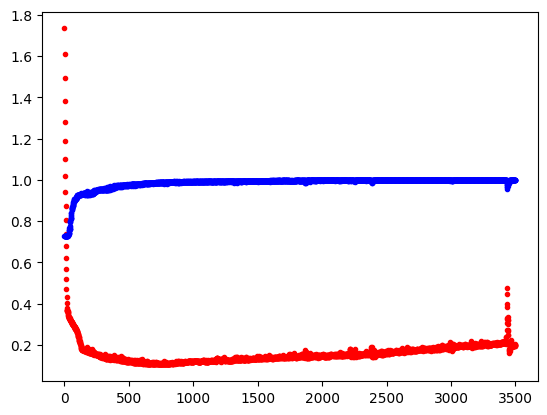

In [16]:
y_vloss = history.history['val_loss']
y_acc = history.history['accuracy']

x_len = np.arange(len(y_acc))
plt.plot(x_len, y_vloss, "o", c="red", markersize=3)
plt.plot(x_len, y_acc, "o", c='blue', markersize=3)
plt.show()